In [21]:
import datetime
import numpy as np
import pandas_datareader.data as web
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tickers="REAINTRATREARAT10Y"
start=datetime.datetime(1930,1,1)
real_interest=web.DataReader(tickers,'fred', start)
cpi=web.DataReader("CPIAUCSL",'fred', start)


In [15]:
control=pd.merge(real_interest, cpi, left_index=True, right_index=True).dropna()

file_path = 'Prices (1).xlsx'

# Name of the sheet to read
sheet_name = 'Daily'

# Read the Excel file for the specific sheet
price = pd.read_excel(file_path, sheet_name=sheet_name)
price.set_index("Date", inplace=True)
modelo=pd.merge(control, price, left_index=True, right_index=True).dropna()

print(modelo)

modelo["log CPIAUCSL"]=modelo['CPIAUCSL'].apply(lambda x:math.log(x,  2.71828))
modelo["log Price"]=modelo['Price'].apply(lambda x:math.log(x,  2.71828))
print(modelo)
# Define the input features (X) and the target variable (y)
X = modelo[['REAINTRATREARAT10Y', "log CPIAUCSL"]]
y = modelo["log Price"]

            REAINTRATREARAT10Y  CPIAUCSL    Price
1982-01-01            7.623742    94.400   397.50
1982-02-01            7.656648    94.700   379.50
1982-03-01            7.128993    94.700   361.25
1982-04-01            7.408347    95.000   327.00
1982-06-01            7.345379    97.000   318.75
...                        ...       ...      ...
2023-09-01            1.699708   307.288  1940.55
2023-11-01            2.094329   308.024  1986.35
2023-12-01            1.680899   308.742  2045.40
2024-01-01            1.680871   309.685  2078.40
2024-02-01            1.616823   311.054  2045.85

[363 rows x 3 columns]
            REAINTRATREARAT10Y  CPIAUCSL    Price  log CPIAUCSL  log Price
1982-01-01            7.623742    94.400   397.50      4.547544   5.985199
1982-02-01            7.656648    94.700   379.50      4.550717   5.938859
1982-03-01            7.128993    94.700   361.25      4.550717   5.889574
1982-04-01            7.408347    95.000   327.00      4.553880   5.789964
1

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False
                                                    # random_state=42
                                                    )


In [17]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='softmax')
])

In [25]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)  # For regression, no activation function in the last layer
])

# Define your optimizer, learning rate, and early stopping
learning_rate = 0.001
patience = 20
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience)

# Compile the model with appropriate loss function for regression
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
MAX_EPOCHS = 500
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=30, callbacks=[early_stopping])

Epoch 1/500
10/10 [==============================] - 1s 3ms/step - loss: 30.2941
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 22.0332
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 12.6578
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 3.8886
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 1.1291
Epoch 6/500
10/10 [==============================] - 0s 3ms/step - loss: 1.1175
Epoch 7/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5104
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4139
Epoch 9/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2809
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2194
Epoch 11/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1746
Epoch 12/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 13/500
10/10 [==============

3/3 [==============================] - 0s 4ms/step


<Axes: >

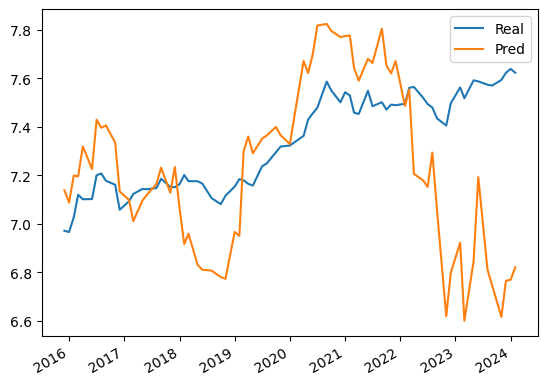

In [26]:
y_pred_train = model.predict(X_test)
y_pred_train

graph = pd.DataFrame({
    "Real": y_test,
    "Pred": np.squeeze(y_pred_train)  # Flatten y_pred_train if needed
})
graph.plot()

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_train)
r2 = r2_score(y_test, y_pred_train)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.1382449388212749
R^2 Score: -2.6036009432028333
